In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv('ToyotaCorolla.csv',engine='python')
data


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
data1=data.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)## Removing the unnecessary values from the data set

In [4]:
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
data1.nunique()

Price             236
Age_08_04          77
KM               1263
HP                 12
cc                 13
Doors               4
Gears               4
Quarterly_Tax      13
Weight             59
dtype: int64

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
data1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


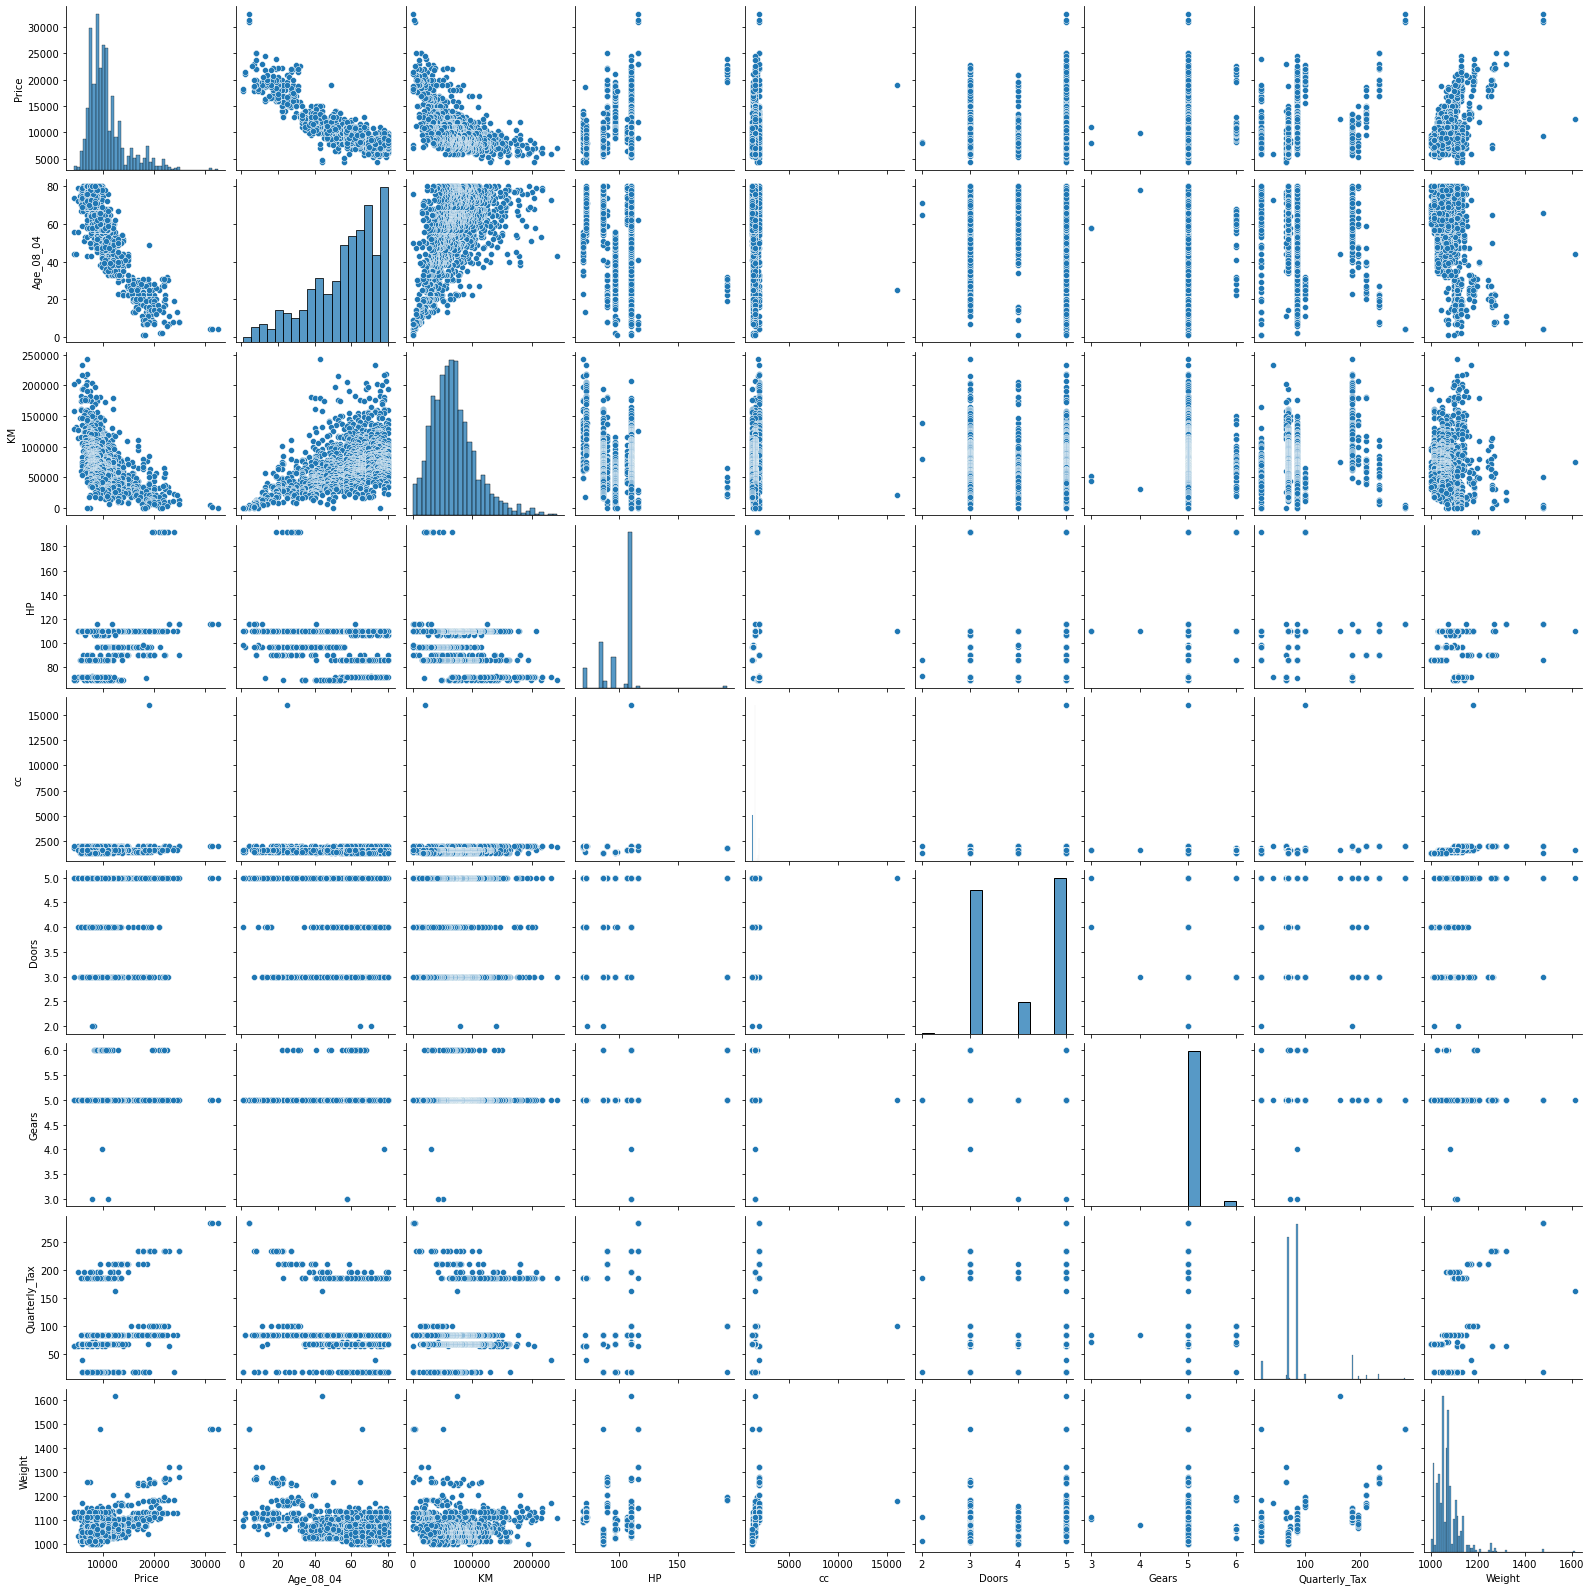

In [7]:
sns.pairplot(data1)

In [8]:
data1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# here we are developing the model considering the above factors

In [5]:
model1=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data1).fit()


In [6]:
model1.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [7]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:45:37   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# since here the pvalue of the cc and the doors  are greater than the 0.05 

# checking for multi colinearity between cc and doors

In [12]:
model_cc=smf.ols('Price~cc',data=data1).fit()

In [13]:
model_cc.pvalues

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

In [14]:
model_door=smf.ols('Price~Doors',data=data1).fit()

In [15]:
model_door.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

# when we check the model individual so both of them are significnt parameters  so we will consider them individually and check for the multicolinearity

In [8]:
model2=smf.ols("Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=data1).fit()

In [9]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1291.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:54:07   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5477.5069   1409.995     -3.885      0.000   -8243.391   -2711.623
Age_08_04      -121.7000      2.616    -46.518      0.000    -126.832    -116.568
KM               -0.0209      0.001    -16.756      0.000      -0.023      -0.018
HP               31.3306      2.807     11.161      0.000      25.824      36.837
Doors            -0.7545     40.012     -0.019      0.985     -79.243      77.734
Gears           598.2602    197.089      3.035      0.002     211.645     984.875
Quarterly_Tax     3.7352      1.301      2.872      0.004       1.184       6.287
Weight           16.7301      1.055     15.864      0.000      14.661      18.799
==============================================================================
Omnibus:                      148.064   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.063
Skew:                          -0.208   Prob(JB):                    6.13e-211
Kurtosis:                       7.001   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model3=smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=data1).fit()

In [11]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:54:08   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# we elimanate both CC and Doors from the model because there p value is greater than 0.05

In [12]:
model4=smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight",data=data1).fit()

In [13]:
model4.params

Intercept       -5478.477784
Age_08_04        -121.699859
KM                 -0.020938
HP                 31.326890
Gears             598.965326
Quarterly_Tax       3.737135
Weight             16.725110
dtype: float64

In [14]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:54:17   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
Age_08_04      -121.6999      2.615    -46.534      0.000    -126.830    -116.570
KM               -0.0209      0.001    -16.769      0.000      -0.023      -0.018
HP               31.3269      2.799     11.191      0.000      25.836      36.818
Gears           598.9653    193.441      3.096      0.002     219.507     978.424
Quarterly_Tax     3.7371      1.296      2.883      0.004       1.194       6.280
Weight           16.7251      1.020     16.393      0.000      14.724      18.726
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
residuals=model4.resid_pearson
residuals

array([-2.47502127, -1.88400678, -2.13141481, ...,  0.03923135,
       -0.98416905, -2.58188543])

In [16]:
predict=model4.predict()
predict

array([16822.4225718 , 16279.05570259, 16811.17164452, ...,
        8447.3365689 ,  8571.13024682, 10415.87503444])

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

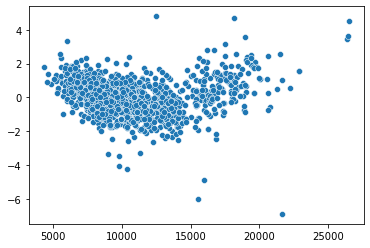

In [17]:
sns.scatterplot(predict,residuals)

In [27]:
## by considering the above of R_squared value the model4 is significant because it dosen't contain the any insignificant values

In [28]:
model4.resid

0      -3322.422572
1      -2529.055703
2      -2861.171645
3      -1486.091673
4      -2481.830556
           ...     
1431   -1284.117470
1432    2560.904652
1433      52.663431
1434   -1321.130247
1435   -3465.875034
Length: 1436, dtype: float64

Text(0.5, 1.0, 'residual plot')

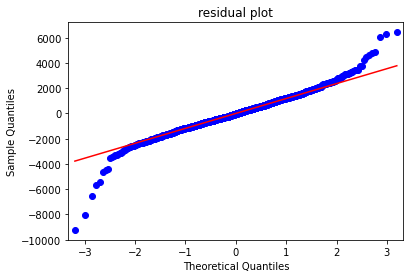

In [32]:
qqplot=sm.qqplot(model4.resid,line='q')
plt.title('residual plot')

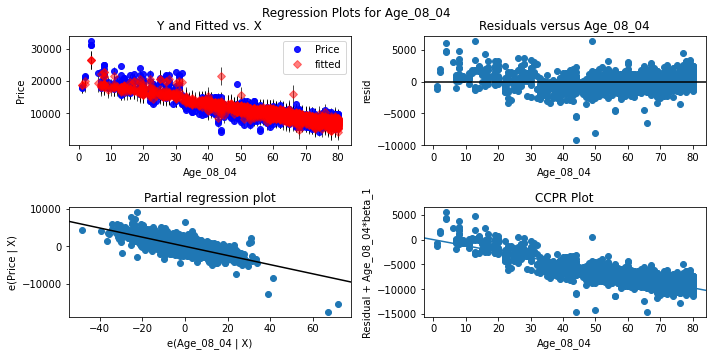

In [18]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model4, "Age_08_04", fig=fig)
plt.show()

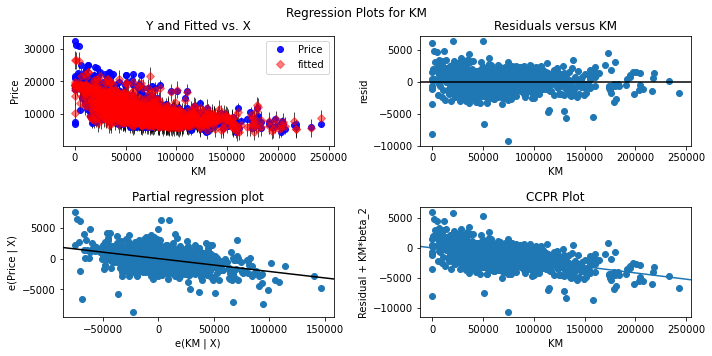

In [20]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model4, "KM", fig=fig)
plt.show()

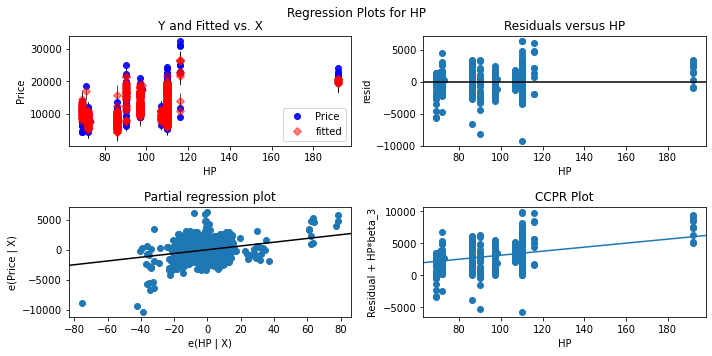

In [21]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model4, "HP", fig=fig)
plt.show()

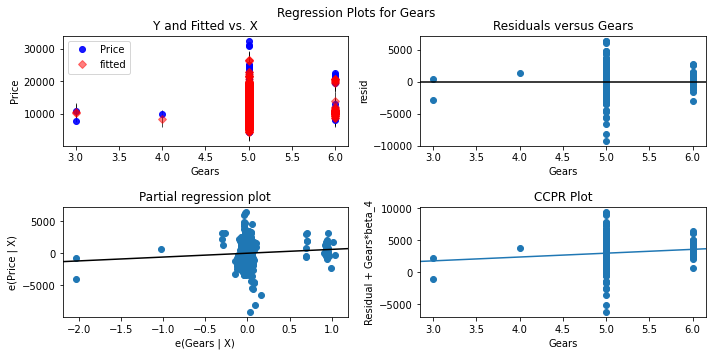

In [24]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model4, "Gears", fig=fig)
plt.show()

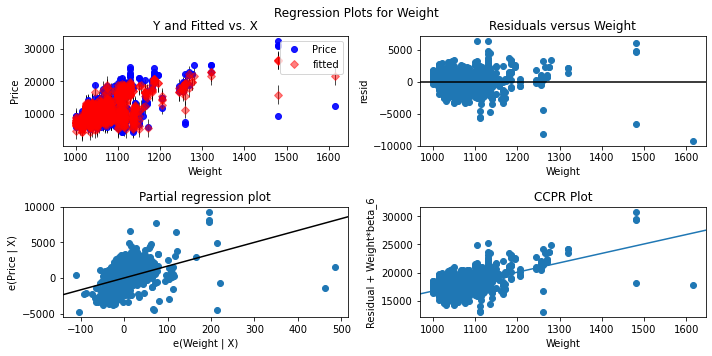

In [25]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model4, "Weight", fig=fig)
plt.show()

In [41]:
influence_val=model4.get_influence()
(c,_)=influence_val.cooks_distance

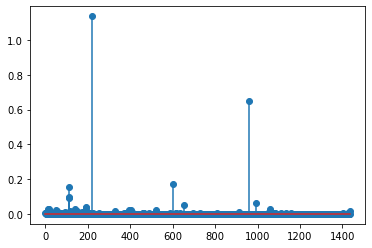

In [42]:
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.show()

In [43]:
(np.argmax(c),np.max(c))

(221, 1.1365473823198646)

In [48]:
data2=data1.drop([221],axis=0).reset_index()
data2

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [27]:
model5=smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=data1).fit()

In [29]:
model5.params

Intercept       -5478.477784
Age_08_04        -121.699859
KM                 -0.020938
HP                 31.326890
Gears             598.965326
Quarterly_Tax       3.737135
Weight             16.725110
dtype: float64

In [30]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:04:38   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
Age_08_04      -121.6999      2.615    -46.534      0.000    -126.830    -116.570
KM               -0.0209      0.001    -16.769      0.000      -0.023      -0.018
HP               31.3269      2.799     11.191      0.000      25.836      36.818
Gears           598.9653    193.441      3.096      0.002     219.507     978.424
Quarterly_Tax     3.7371      1.296      2.883      0.004       1.194       6.280
Weight           16.7251      1.020     16.393      0.000      14.724      18.726
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""